<a href="https://colab.research.google.com/github/drdww/OPIM5641/blob/main/Module5/M5_2/2_Shortest_Path_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Network Models: Shortest Path Problem

Related Readings:

* Pyomo Cookbook: https://github.com/jckantor/ND-Pyomo-Cookbook/blob/master/notebooks/03.01-Transportation-Networks.ipynb
* Powell: Chapter 10 (Optimization of Network Models)


# Shortest Path Problem

* What is the minimum distance between two points in a network
* Chances are that you use the result of shortest paths everyday
  * GPS: Waze, Google Maps, etc. (we will see an example in this notebook)
  ![Waze](https://i.imgur.com/B6XlewH.png)
  * Rubik’s Cube solution: Quickest way to go from one configuration to another
![Rubik Cube](https://upload.wikimedia.org/wikipedia/commons/thumb/6/61/Rubiks_cube_solved.jpg/440px-Rubiks_cube_solved.jpg)
  * Separation in a social network
    * [Kevin Bacon Number](https://simple.wikipedia.org/wiki/Bacon_number): "Movie buffs challenge each other to find the shortest path between an arbitrary actor and prolific actor Kevin Bacon."
    ![Kevin Bacon number](https://miro.medium.com/max/957/1*6rJ2T1-LG0PXemMY85HMJw.png)
    * [Paul Erdős Number](https://en.wikipedia.org/wiki/Paul_Erd%C5%91s): "The Erdős number describes the "collaborative distance" between mathematician Paul Erdős and another person, as measured by authorship of mathematical papers."

    ![Paul Erdos](https://upload.wikimedia.org/wikipedia/commons/2/2f/Erdos_budapest_fall_1992_%28cropped%29.jpg)

## Shortest Path Models

Shortest path models are very similar to minimum cost flow models. More precisely, they are a special case where the nodes represent locations (e.g., cities or specific addresses that you want to consider in your model), arcs represent the paths between locations (cost may represent traversal time), the origin node has $B = 1$, the destination node has $B = -1$, and all the other nodes are transshipment nodes, with $B = 0$. Also, all arcs have a lower bound of 0 and an upper bound of 1. By the way, this is an interesting exercise: **why can we assume that all arcs have an upper bound of 1?**

There are smart algorithms to solve the Shortest Path Problem. The classic algorithm was developed by [Djikstra](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm), and chances are you are using his algorithm every time you use a GPS.

![Djikstra](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Edsger_Wybe_Dijkstra.jpg/440px-Edsger_Wybe_Dijkstra.jpg)

Similarly to matching problems, though, there are some advantages of using linear programming models to solve shortest path problems. For example, it is much easier to include some constraints to your shortest path as it would be in Dijkstra's algorithm.



# Blaze (extracted from the textbook)

Blaze is a new GPS app which uses user input to predict travel times and find optimal routes for travelers.  During rush hour, Blaze receives a request from a user to find the best route from her home to her office.  Waze is able to break the decision into only a portion of the map, consisting of 5 intersections and the starting/ending location.  The locations are connected as follows, with the time to travel between the locations given on the arcs.  **What is the path that minimizes the time that the user will have to travel from O to D?**


Network:

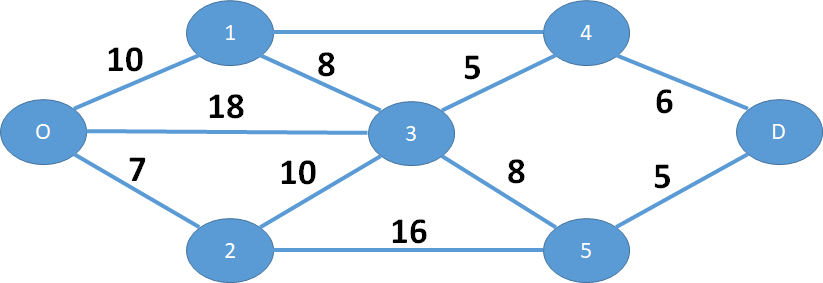

**Set of arcs in the network**
$A = \{O1,O2,O3,13,14,23,25,34,35,4D,5D\}$

**Objective Function**

$\min \sum\limits_{a \in A} c_a \cdot x_a$ `(objective function)`

**Write the Constraints**

subject to:

**Supply nodes: B > 0**
* $ \sum\limits_{a \in \{O1,O2,O3\} } x_{a} \leq 1$   `(Origin)`

**Transshipment nodes: B = 0**
* $  \sum\limits_{a \in \{O1\} } -x_{a}  + \sum\limits_{a \in \{13,14\} } x_{a} = 0$   `(Node 1)`
* $ \sum\limits_{a \in \{O2\} } -x_{a}  + \sum\limits_{a \in \{23,25\} } x_{a} = 0$   `(Node 2)`
* $ \sum\limits_{a \in \{O3,13,23\} } -x_{a}  + \sum\limits_{a \in \{34,35\} } x_{a} = 0$   `(Node 3)`
* $ \sum\limits_{a \in \{14,34\} } -x_{a}  + \sum\limits_{a \in \{4D\} } x_{a} = 0$   `(Node 4)`
* $ \sum\limits_{a \in \{25,35\} } -x_{a}  + \sum\limits_{a \in \{5D\} } x_{a} = 0$   `(Node 5)`

**Demand nodes: B < 0 (be careful with negative signs!!!)**
* $ \sum\limits_{a \in \{4D,5D\} } -x_{a} = -1$   `(Destination)`

**Upper bounds**
* $x_a \leq 1, a \in A$

**Domain**
* $x_a \in \mathbb{R}^+$


In [ ]:
# before you do anything...
# mount your drive!
# click folder on the left...
# import modules

%matplotlib inline
from pylab import *

import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not (shutil.which("cbc") or os.path.isfile("cbc")):
    if "google.colab" in sys.modules:
        !apt-get install -y -qq coinor-cbc
    else:
        try:
            !conda install -c conda-forge coincbc 
        except:
            pass

assert(shutil.which("cbc") or os.path.isfile("cbc"))

from pyomo.environ import *
# ensure you have cbc installed
!apt-get install -y -qq coinor-cbc

     |████████████████████████████████| 9.4MB 7.3MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 256kB 79.4MB/s 
     |████████████████████████████████| 163kB 76.7MB/s 
Selecting previously unselected package coinor-libcoinutils3v5.
(Reading database ... 144618 files and directories currently installed.)
Preparing to unpack .../0-coinor-libcoinutils3v5_2.10.14+repack1-1_amd64.deb ...
Unpacking coinor-libcoinutils3v5 (2.10.14+repack1-1) ...
Selecting previously unselected package coinor-libosi1v5.
Preparing to unpack .../1-coinor-libosi1v5_0.107.9+repack1-1_amd64.deb ...
Unpacking coinor-libosi1v5 (0.107.9+repack1-1) ...
Selecting previously unselected package coinor-libclp1.
Preparing to unpack .../2-coinor-libclp1_1.16.11+repack1-1_amd64.deb ...
Unpacking coinor-libclp1 (1.16.11+repack1-1) ...
Selecting previously unselected package coinor-libcgl1.
Preparing to unpack .../3-coinor-libcgl1_0.59.10+repack1-1_amd64.deb ...
Unpacking coi

In [ ]:
B = {
    'O' : 1,
     '1' : 0,
     '2' : 0,
     '3' : 0,
     '4' : 0,
     '5' : 0,
     'D' : -1
}
# List of nodes in the network
nodes = list(B.keys())

LB = {
    'O_1' : 0,
    'O_2' : 0,
    'O_3' : 0,
    '1_3' : 0,
    '1_4' : 0,
    '2_3' : 0,
    '2_5' : 0,
    '3_4' : 0,
    '3_5' : 0,
    '4_D' : 0,
    '5_D' : 0
}

# List of arcs in the network
arcs = list(LB.keys())


UB = {
    'O_1' : 1,
    'O_2' : 1,
    'O_3' : 1,
    '1_3' : 1,
    '1_4' : 1,
    '2_3' : 1,
    '2_5' : 1,
    '3_4' : 1,
    '3_5' : 1,
    '4_D' : 1,
    '5_D' : 1
}


Cost = {
    'O_1' : 10,
    'O_2' : 7,
    'O_3' : 18,
    '1_3' : 8,
    '1_4' : 13,
    '2_3' : 10,
    '2_5' : 16,
    '3_4' : 5,
    '3_5' : 8,
    '4_D' : 6,
    '5_D' : 5
}


In [ ]:
# Same boilerplate works for all network models
def create_bounds(model, i):
   return (LB[i], UB[i])


# declare the model
model = ConcreteModel()

# Create variables
model.x = Var(arcs, domain = NonNegativeReals, bounds=create_bounds)

# Constraints
model.constraints = ConstraintList()
for node in nodes:
  flow_expr = 0
  for arc in arcs:
    u,v = arc.split('_')
    # Arc is pushing flow from the node
    if node == u:
      flow_expr += model.x[arc]

    # Arc is pulling flow in the node
    if node == v:
      flow_expr -= model.x[arc]


  # Flow balance defined by B
  # Origin
  if 0 < B[node]:
    model.constraints.add(flow_expr == B[node])
  # Transshipment node, net flow must be zero
  elif 0 == B[node]:
    model.constraints.add(flow_expr == B[node])
  # Destination
  else:
    model.constraints.add(flow_expr == B[node])


# Objective
obj_expr = 0.0
for arc in arcs:
  obj_expr += Cost[arc]*model.x[arc]

model.cost = Objective(
    expr = obj_expr, 
    sense = minimize)

model.pprint()

2 Set Declarations
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    7 : {1, 2, 3, 4, 5, 6, 7}
    x_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   11 : {'O_1', 'O_2', 'O_3', '1_3', '1_4', '2_3', '2_5', '3_4', '3_5', '4_D', '5_D'}

1 Var Declarations
    x : Size=11, Index=x_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
        1_3 :     0 :  None :     1 : False :  True : NonNegativeReals
        1_4 :     0 :  None :     1 : False :  True : NonNegativeReals
        2_3 :     0 :  None :     1 : False :  True : NonNegativeReals
        2_5 :     0 :  None :     1 : False :  True : NonNegativeReals
        3_4 :     0 :  None :     1 : False :  True : NonNegativeReals
        3_5 :     0 :  None :     1 : False :  True : NonNegativeReals
        4_D :     0 :  None :     1 : False :  True : Non

In [ ]:
# Solve the model
SolverFactory('cbc', executable='/usr/bin/cbc').solve(model).write()

# show the results
print('Total cost:',model.cost())
print('Arc flow:')
for arc in arcs:
  print("\tFlow at arc",arc,":",model.x[arc]())
print('Node flow:')
for node in nodes:
  flow = 0
  for arc in arcs:
    u,v = arc.split('_')
    # Arc is pushing flow in the node
    if node == u:
      flow += model.x[arc]()

    # Arc is pulling flow from the node
    if node == v:
      flow -= model.x[arc]()
  print("\tFlow at node",node,":",flow)


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 28.0
  Upper bound: 28.0
  Number of objectives: 1
  Number of constraints: 8
  Number of variables: 12
  Number of nonzeros: 0
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.0
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number of created subp